In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("./process_data/parent bedroom.xlsx")
df.head(2)

,start_time,end_time,motion,power,acoustic,CO2,luminosity,humidity,temperature,contact
0,2022-05-01 00:00:00,2022-05-01 01:00:00,0.000000,0.276170,0.365547,2.190469e-07,0.299143,0.999998,0.127428,0.0
1,2022-05-01 01:00:00,2022-05-01 02:00:00,0.001532,0.298803,0.379606,2.094024e-07,0.299143,0.999997,0.146779,0.0


In [3]:
datatypes = [col for col in df.columns if col not in {"start_time", "end_time"}]
datatypes

['motion',
 'power',
 'acoustic',
 'CO2',
 'luminosity',
 'humidity',
 'temperature',
 'contact']

In [4]:
morning_start = pd.to_datetime("05:00:00").time()
morning_end = pd.to_datetime("12:00:00").time()

afternoon_start = pd.to_datetime("13:00:00").time()
afternoon_end = pd.to_datetime("20:00:00").time()

dates = df["start_time"].dt.date.unique()

dates[:5:]

array([datetime.date(2022, 5, 1), datetime.date(2022, 5, 2),
       datetime.date(2022, 5, 3), datetime.date(2022, 5, 4),
       datetime.date(2022, 5, 5)], dtype=object)

In [5]:
df_data = {"date": [], "time": []}

for datatype in datatypes:
    df_data[datatype] = []

In [6]:
for date in dates:
    rows = df[
        df["start_time"].dt.date == date
    ]

    """---------------MORNING TIME---------------"""
    morning_df = rows[
        (rows["start_time"].dt.time >= morning_start) &
        (rows["start_time"].dt.time <= morning_end) &
        (rows["end_time"].dt.time <= morning_end)
    ].sort_values("start_time")

    for datatype in datatypes:
        df_data[datatype].append(
            np.array(
                morning_df[datatype].tolist()
            )
        )

    df_data["date"].append(date)
    df_data["time"].append(f"{morning_start} - {morning_end}")

    """---------------AFTERNOON TIME--------------"""
    afternoon_df = rows[
        (rows["start_time"].dt.time >= afternoon_start) &
        (rows["start_time"].dt.time <= afternoon_end) &
        (rows["end_time"].dt.time <= afternoon_end)
    ]

    for datatype in datatypes:
        df_data[datatype].append(
            np.array(
                afternoon_df[datatype].tolist()
            )
        )

    df_data["date"].append(date)
    df_data["time"].append(f"{afternoon_start} - {afternoon_end}")

In [7]:
time_df = pd.DataFrame(df_data)
time_df.head(10)

,date,time,motion,power,acoustic,CO2,luminosity,humidity,temperature,contact
0,2022-05-01,05:00:00 - 12:00:00,"[0.002553626149131767, 0.00153217568947906, 0....","[0.3130291981574643, 0.4884953847452534, 0.159...","[0.3936660815335533, 0.3848787873424611, 0.323...","[1.532889623278333e-07, 1.316619209317234e-07,...","[0.2991429299660159, 0.442931943412642, 0.6749...","[0.9999965609746164, 0.9999963151981067, 0.999...","[0.1521792869673323, 0.176930065090981, 0.1380...","[0.0, 0.002801120448179272, 0.0, 0.0, 0.0, 0.0..."
1,2022-05-01,13:00:00 - 20:00:00,"[0.00153217568947906, 0.0005107252298263534, 0...","[0.3826571144903347, 0.5077395753107061, 0.402...","[0.3760914931513684, 0.3749198324727967, 0.414...","[1.430599562621057e-07, 1.243554880276322e-07,...","[0.2991429299660159, 0.2991429299660159, 0.737...","[0.9999964027493904, 0.9999964027493904, 0.999...","[0.1420539374318375, 0.144303976958167, 0.1611...","[0.005602240896358543, 0.0, 0.0, 0.00280112044..."
2,2022-05-02,05:00:00 - 12:00:00,"[0.002553626149131767, 0.003575076608784474, 0...","[0.1790368219193711, 0.4813066059760077, 0.758...","[0.4217849724300939, 0.4071396966425378, 0.449...","[1.446673715010058e-07, 1.335908120832151e-07,...","[0.2991429299660159, 0.2991429299660159, 0.299...","[0.9999962445241645, 0.9999962049678579, 0.999...","[0.1679298211521568, 0.1555543462568265, 0.118...","[0.0, 0.002801120448179272, 0.0, 0.0, 0.0, 0.0..."
3,2022-05-02,13:00:00 - 20:00:00,"[0.0, 0.0, 0.0005107252298263534, 0.0010214504...","[0.7119723257980068, 0.5804633253737873, 0.459...","[0.4217849724300939, 0.3936660815335533, 0.390...","[6.721918271763896e-09, 4.383859742454725e-09,...","[0.2991429301642192, 0.2991429299660159, 0.299...","[0.9999958489610994, 0.9999957698484865, 0.999...","[0.1521792869673323, 0.1319285878963427, 0.127...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0056022408963..."
4,2022-05-03,05:00:00 - 12:00:00,"[0.002042900919305414, 0.001021450459652707, 0...","[0.4851160529277443, 0.5931927572981781, 0.548...","[0.2706452500438452, 0.3303983356690394, 0.224...","[2.063909250983083e-07, 2.061875365534537e-07,...","[0.2991429299660159, 0.2991429299660159, 0.299...","[0.9999945934437139, 0.9999964027493904, 0.999...","[0.165117228827492, 0.153304306730497, 0.17693...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0028011204481..."
5,2022-05-03,13:00:00 - 20:00:00,"[0.0, 0.0, 0.0, 0.001021450459652707, 0.0, 0.0...","[0.1601813063425178, 0.1589970463660545, 0.179...","[0.2952494807010662, 0.2249520925615158, 0.330...","[9.933826889921233e-08, 6.941111258886638e-08,...","[0.2991429299660159, 0.2991429299660159, 0.299...","[0.9999964027493904, 0.9999964027493904, 0.999...","[0.1437415099933376, 0.1409289176686727, 0.140...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,2022-05-04,05:00:00 - 12:00:00,"[0.002553626149131767, 0.0005107252298263534, ...","[0.1897184020566484, 0.1768920078456347, 0.158...","[0.3374279779440754, 0.4077253660836258, 0.358...","[1.72724073852716e-07, 1.737469744592887e-07, ...","[0.2991429299660159, 0.2991429299660159, 0.299...","[0.9999968774250684, 0.9999968378687619, 0.999...","[0.1634296562659918, 0.1561168990551619, 0.151...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7,2022-05-04,13:00:00 - 20:00:00,"[0.0, 0.0005107252298263534, 0.0, 0.0015321756...","[0.1589440144020626, 0.1604149551465784, 0.163...","[0.4124120087979137, 0.3983524024514451, 0.412...","[8.507609760004954e-08, 8.783805767118689e-08,...","[0.2991429299660159, 0.2936659934046651, 0.299...","[0.9999965609746164, 0.9999965609746164, 0.999...","[0.1544293264936618, 0.1724299002048159, 0.154...","[0.0, 0.0, 0.0, 0.0, 0.002801120448179272, 0.0..."
8,2022-05-05,05:00:00 - 12:00:00,"[0.0005107252298263534, 0.0, 0.0, 0.0, 0.0, 0....","[0.2027717545252012, 0.1661653643090151, 0.164...","[0.3936660815335533, 0.4077253660836258, 0.406...","[1.756466470143524e-07, 1.58549594018779e-07, ...","[0.4392803458926797, 0.2991429299660159, 0.299...","[0.9999970356502944, 0.9999971827998029, 0.999...","[0.1949306388

In [8]:
env_df = time_df[["date", "time"] + [datatype for datatype in datatypes if datatype not in {"motion", "contact"}]]
human_df = time_df[["date", "time", "motion", "contact"]]

In [9]:
env_df.head(2)

,date,time,power,acoustic,CO2,luminosity,humidity,temperature
0,2022-05-01,05:00:00 - 12:00:00,"[0.3130291981574643, 0.4884953847452534, 0.159...","[0.3936660815335533, 0.3848787873424611, 0.323...","[1.532889623278333e-07, 1.316619209317234e-07,...","[0.2991429299660159, 0.442931943412642, 0.6749...","[0.9999965609746164, 0.9999963151981067, 0.999...","[0.1521792869673323, 0.176930065090981, 0.1380..."
1,2022-05-01,13:00:00 - 20:00:00,"[0.3826571144903347, 0.5077395753107061, 0.402...","[0.3760914931513684, 0.3749198324727967, 0.414...","[1.430599562621057e-07, 1.243554880276322e-07,...","[0.2991429299660159, 0.2991429299660159, 0.737...","[0.9999964027493904, 0.9999964027493904, 0.999...","[0.1420539374318375, 0.144303976958167, 0.1611..."


In [10]:
human_df.head(2)

,date,time,motion,contact
0,2022-05-01,05:00:00 - 12:00:00,"[0.002553626149131767, 0.00153217568947906, 0....","[0.0, 0.002801120448179272, 0.0, 0.0, 0.0, 0.0..."
1,2022-05-01,13:00:00 - 20:00:00,"[0.00153217568947906, 0.0005107252298263534, 0...","[0.005602240896358543, 0.0, 0.0, 0.00280112044..."


In [11]:
env_final_df = {"date": [], "time": [], "data": []}
human_final_df = {"date": [], "time": [], "data": []}

for index, row in env_df.iterrows():
    env_datatypes = [datatype for datatype in datatypes if datatype not in {"motion", "contact"}]
    data = row[env_datatypes[0]]
    
    for i in range(1, len(env_datatypes)):
        datatype = env_datatypes[i]

        data = np.vstack((data, row[datatype]))        
        data = np.squeeze(data)
        
    env_final_df["date"].append(row["date"])
    env_final_df["time"].append(row["time"])
    env_final_df["data"].append(data)

for index, row in human_df.iterrows():
    data = row[datatypes[0]]
    
    for datatype in {"motion", "contact"}:
        data = np.vstack((data, row[datatype]))        
        data = np.squeeze(data)
        
    human_final_df["date"].append(row["date"])
    human_final_df["time"].append(row["time"])
    human_final_df["data"].append(data)

In [12]:
env_final_df = pd.DataFrame(env_final_df)
human_final_df = pd.DataFrame(human_final_df)

In [13]:
env_final_df.head(2)

,date,time,data
0,2022-05-01,05:00:00 - 12:00:00,"[[0.3130291981574643, 0.4884953847452534, 0.15..."
1,2022-05-01,13:00:00 - 20:00:00,"[[0.3826571144903347, 0.5077395753107061, 0.40..."


In [14]:
human_final_df.head(2)

,date,time,data
0,2022-05-01,05:00:00 - 12:00:00,"[[0.002553626149131767, 0.00153217568947906, 0..."
1,2022-05-01,13:00:00 - 20:00:00,"[[0.00153217568947906, 0.0005107252298263534, ..."


In [15]:
env_final_df.loc[0]["data"]

array([[3.13029198e-01, 4.88495385e-01, 1.59044310e-01, 0.00000000e+00,
        6.72146308e-02, 1.58997046e-01, 1.58997046e-01],
       [3.93666082e-01, 3.84878787e-01, 3.23368372e-01, 4.12412009e-01,
        4.21784972e-01, 4.49903863e-01, 2.81189874e-01],
       [1.53288962e-07, 1.31661921e-07, 9.46913704e-08, 1.02611537e-07,
        6.53195102e-08, 9.45452418e-08, 1.14564868e-07],
       [2.99142930e-01, 4.42931943e-01, 6.74995021e-01, 7.37637037e-01,
        2.99142930e-01, 2.99142930e-01, 3.18748669e-01],
       [9.99996561e-01, 9.99996315e-01, 9.99996379e-01, 9.99996403e-01,
        9.99996118e-01, 9.99996245e-01, 9.99996284e-01],
       [1.52179287e-01, 1.76930065e-01, 1.38003798e-01, 1.46554102e-01,
        1.41828968e-01, 1.38678792e-01, 1.58929491e-01]])

In [16]:
env_final_df.loc[0]["data"].shape

(6, 7)

In [17]:
human_final_df.loc[0]["data"].shape

(3, 7)

In [18]:
env_df = env_final_df.drop(
    index=env_final_df[
        env_final_df["data"].apply(lambda x: x.shape != (6, 7))
    ].index
).reset_index(drop=True)

human_df = human_final_df.drop(
    index=human_final_df[
        human_final_df["data"].apply(lambda x: x.shape != (3, 7))
    ].index
).reset_index(drop=True)

env_df.head(10)

,date,time,data
0,2022-05-01,05:00:00 - 12:00:00,"[[0.3130291981574643, 0.4884953847452534, 0.15..."
1,2022-05-01,13:00:00 - 20:00:00,"[[0.3826571144903347, 0.5077395753107061, 0.40..."
2,2022-05-02,05:00:00 - 12:00:00,"[[0.1790368219193711, 0.4813066059760077, 0.75..."
3,2022-05-02,13:00:00 - 20:00:00,"[[0.7119723257980068, 0.5804633253737873, 0.45..."
4,2022-05-03,05:00:00 - 12:00:00,"[[0.4851160529277443, 0.5931927572981781, 0.54..."
5,2022-05-03,13:00:00 - 20:00:00,"[[0.1601813063425178, 0.1589970463660545, 0.17..."
6,2022-05-04,05:00:00 - 12:00:00,"[[0.1897184020566484, 0.1768920078456347, 0.15..."
7,2022-05-04,13:00:00 - 20:00:00,"[[0.1589440144020626, 0.1604149551465784, 0.16..."
8,2022-05-05,05:00:00 - 12:00:00,"[[0.2027717545252012, 0.1661653643090151, 0.16..."
9,2022-05-05,13:00:00 - 20:00:00,"[[0.1645111373514517, 0.1638533839041346, 0.16..."


In [19]:
env_data = np.stack(
    tuple(env_df["data"])
)

human_data = np.stack(
    tuple(human_df["data"])
)

# 1. Environmental Indoor Data Clustering

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [21]:
env_data.shape, env_data[0]

((726, 6, 7),
 array([[3.13029198e-01, 4.88495385e-01, 1.59044310e-01, 0.00000000e+00,
         6.72146308e-02, 1.58997046e-01, 1.58997046e-01],
        [3.93666082e-01, 3.84878787e-01, 3.23368372e-01, 4.12412009e-01,
         4.21784972e-01, 4.49903863e-01, 2.81189874e-01],
        [1.53288962e-07, 1.31661921e-07, 9.46913704e-08, 1.02611537e-07,
         6.53195102e-08, 9.45452418e-08, 1.14564868e-07],
        [2.99142930e-01, 4.42931943e-01, 6.74995021e-01, 7.37637037e-01,
         2.99142930e-01, 2.99142930e-01, 3.18748669e-01],
        [9.99996561e-01, 9.99996315e-01, 9.99996379e-01, 9.99996403e-01,
         9.99996118e-01, 9.99996245e-01, 9.99996284e-01],
        [1.52179287e-01, 1.76930065e-01, 1.38003798e-01, 1.46554102e-01,
         1.41828968e-01, 1.38678792e-01, 1.58929491e-01]]))

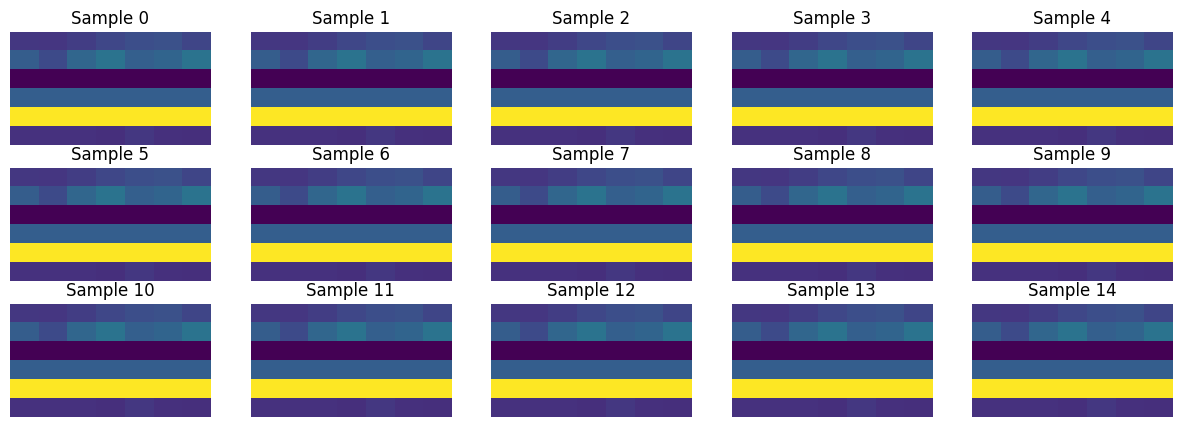

In [22]:
num_samples = 5
n_rows = 3
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for y in range(n_rows):
    for x in range(num_samples):
        ax = axes[y, x]
        ax.imshow(env_data[i], cmap='viridis', aspect='auto')
        ax.set_title(f"Sample {y * num_samples + x}")
        ax.axis("off")

plt.show()

## 1.1. Flatten KMeans

In [23]:
import os

import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

from models.flatten_models import KMeans, HDBSCAN
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [24]:
distance_matrix = squareform(pdist(env_data.reshape(726, -1), metric="cosine"))
x_mean = np.mean(env_data, axis = 2)

In [25]:
possible_k = range(1, 50)
flatten_kmeans_models = [] 
wcss = []

for k in tqdm(possible_k):
    flatten_kmeans = KMeans.Flatten_KMeans(n_clusters = k)
    flatten_kmeans.fit(env_data)

    flatten_kmeans_models.append(flatten_kmeans)
    wcss.append(flatten_kmeans.model.inertia_)

100%|██████████| 49/49 [00:00<00:00, 129.18it/s]


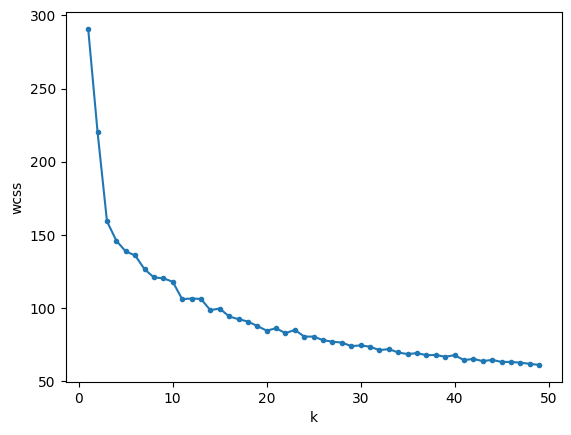

In [26]:
plt.plot(possible_k, wcss, marker = ".", linestyle = "-")
plt.xlabel("k")
plt.ylabel("wcss")
plt.show()

In [57]:
k = 8
flatten_kmeans = KMeans.Flatten_KMeans(n_clusters = k)
labels = flatten_kmeans.fit_predict(env_data)

AttributeError: type object 'KMeans' has no attribute 'Flatten_KMeans'

In [ ]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 2 (mean)',
        zaxis_title='Feature 3 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [58]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 3],
        y=cluster_points[:, 4],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 4 (mean)',
        yaxis_title='Feature 5 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [59]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 2],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 3 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [60]:
flatten_kmeans_silhouette = silhouette_score(distance_matrix, labels, metric = "euclidean")
flatten_kmeans_silhouette

np.float64(-0.11657857813794179)

## 1.2. Flatten HDBSCAN

In [61]:
flatten_hdbscan = HDBSCAN.Flatten_HDBSCAN()
labels = flatten_hdbscan.fit_predict(env_data)

In [62]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 2 (mean)',
        zaxis_title='Feature 3 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [34]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(k):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 3],
        y=cluster_points[:, 4],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 4 (mean)',
        yaxis_title='Feature 5 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [63]:
flatten_hdbscan_silhouette = silhouette_score(distance_matrix, labels, metric = "euclidean")
flatten_hdbscan_silhouette

np.float64(-0.1209864461467672)

## 1.3. Time Series Kmeans

In [64]:
from models.unflatten_models import TimeSeriesKMeans

k = 8
time_series_kmeans = TimeSeriesKMeans.TimeSeries_KMeans(n_clusters = k)
labels = time_series_kmeans.fit_predict(env_data)

d:\AppData\miniconda3\envs\cluster\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\AppData\miniconda3\envs\cluster\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [65]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 2 (mean)',
        zaxis_title='Feature 3 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [66]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 3],
        y=cluster_points[:, 4],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 4 (mean)',
        yaxis_title='Feature 5 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [67]:
timeseries_kmeans_silhouette = silhouette_score(distance_matrix, labels, metric = "cosine")
timeseries_kmeans_silhouette

np.float64(0.2778218254905848)

## 1.4. SOM

In [68]:
from minisom import MiniSom

In [69]:
flatten_data = env_data.reshape((env_data.shape[0], -1))
flatten_data.shape

(726, 42)

In [70]:
som_size = (5, 5)
som = MiniSom(som_size[0], som_size[1], flatten_data.shape[1], sigma=0.3, learning_rate=0.5)
som.train_random(flatten_data, 300000)

In [71]:
clusters = np.array([som.winner(x) for x in flatten_data])
labels = np.array([c[0] * som_size[1] + c[1] for c in clusters])
print(np.unique(labels))

[ 2  3  4  7  8  9 12 13 14 17 18 19 23]


In [72]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 2 (mean)',
        zaxis_title='Feature 3 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [74]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 3],
        y=cluster_points[:, 4],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 4 (mean)',
        yaxis_title='Feature 5 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [75]:
som_silhouette = silhouette_score(distance_matrix, labels, metric = "cosine")
som_silhouette

np.float64(0.18029562390268078)

## 1.5. Gaussian Mixture

In [76]:
from models.flatten_models import GaussianMixture

gmm = GaussianMixture.Gaussian_Mixture()
labels = gmm.fit_predict(flatten_data)

In [77]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 1 (mean)',
        yaxis_title='Feature 2 (mean)',
        zaxis_title='Feature 3 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [78]:
colors = px.colors.qualitative.Set1
fig = go.Figure()

for i in range(len(labels)):
    cluster_points = x_mean[labels == i]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 3],
        y=cluster_points[:, 4],
        z=cluster_points[:, 5],
        mode='markers',
        marker=dict(size=6, color=colors[i % len(colors)], opacity=0.8),
        name=f'Cluster {i}'
    ))

fig.update_layout(
    title=f'Biểu diễn các cụm dữ liệu lấy theo giá trị trung bình của time-series',
    scene=dict(
        xaxis_title='Feature 4 (mean)',
        yaxis_title='Feature 5 (mean)',
        zaxis_title='Feature 6 (mean)',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,  # Tăng chiều rộng
    height=450   # Tăng chiều cao
)
fig.show()

In [79]:
gmm_silhouette = silhouette_score(distance_matrix, labels, metric = "cosine")
gmm_silhouette

np.float64(-0.19308775554005034)